Used cars catalog
<br>link:https://www.kaggle.com/lepchenkov/usedcarscatalog?select=cars.csv
<br>The data is scraped in Belarus (western Europe) on the 2nd of December 2019, so the dataset is pretty fresh and relevant. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('cars.csv')

<b>Examine the Data
        <br>Column features and types

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
manufacturer_name    38531 non-null object
model_name           38531 non-null object
transmission         38531 non-null object
color                38531 non-null object
odometer_value       38531 non-null int64
year_produced        38531 non-null int64
engine_fuel          38531 non-null object
engine_has_gas       38531 non-null bool
engine_type          38531 non-null object
engine_capacity      38521 non-null float64
body_type            38531 non-null object
has_warranty         38531 non-null bool
state                38531 non-null object
drivetrain           38531 non-null object
price_usd            38531 non-null float64
is_exchangeable      38531 non-null bool
location_region      38531 non-null object
number_of_photos     38531 non-null int64
up_counter           38531 non-null int64
feature_0            38531 non-null bool
feature_1            38531 non-null bool


In [4]:
data

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
5,Subaru,Outback,automatic,silver,132449,2011,gasoline,False,gasoline,2.5,...,True,False,False,False,True,False,True,True,True,67
6,Subaru,Forester,automatic,black,318280,1998,gasoline,False,gasoline,2.5,...,True,False,False,True,True,False,False,True,True,307
7,Subaru,Legacy,automatic,silver,350000,2004,gasoline,False,gasoline,2.5,...,True,True,False,False,False,False,False,False,True,73
8,Subaru,Outback,automatic,grey,179000,2010,gasoline,False,gasoline,2.5,...,True,True,True,True,True,True,True,True,True,87
9,Subaru,Forester,automatic,silver,571317,1999,gasoline,False,gasoline,2.5,...,True,True,False,False,True,False,False,False,True,43


<b>Check for null values

In [5]:
data.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

<b>Engine Capacity contains null values
    <br>categorical engine values

In [6]:
data['engine_capacity'].head()

0    2.5
1    3.0
2    2.5
3    3.0
4    2.5
Name: engine_capacity, dtype: float64

<b>Feature is null because they are electric vehicles - therefore the information is not applicable</b>
    <br>Electric vehicles are removed, because they are under-represented - as there are only 10 electric vehicles.

In [7]:
#check what dataset is null and why
data[data['engine_capacity'].isnull()]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
8782,Fiat,500,automatic,orange,27000,2013,electric,False,electric,NaN,...,True,False,True,True,True,False,True,True,True,77
9048,Fiat,500,automatic,orange,49000,2014,electric,False,electric,NaN,...,False,False,True,False,True,False,True,False,True,11
24226,Chevrolet,Volt,automatic,silver,168000,2013,electric,False,electric,NaN,...,False,False,True,False,False,False,True,True,True,6
25943,Nissan,Leaf,automatic,white,57357,2015,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,75
26203,Nissan,Leaf,automatic,blue,97400,2011,electric,False,electric,NaN,...,True,False,False,False,False,False,True,False,True,64
26222,Nissan,Leaf,automatic,white,50000,2014,electric,False,electric,NaN,...,True,False,False,False,True,False,True,True,False,18
26582,Nissan,Leaf,automatic,black,84000,2014,electric,False,electric,NaN,...,False,False,False,False,True,True,True,True,True,138
26914,Nissan,Leaf,automatic,black,84500,2013,electric,False,electric,NaN,...,True,False,True,False,True,True,True,True,True,58
27554,BMW,i3,automatic,white,54150,2015,electric,False,electric,NaN,...,True,True,True,False,True,True,True,True,True,18
29590,BMW,i3,automatic,other,67000,2018,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,57


In [8]:
#check how many electric vehicles
data[data['engine_fuel'] == 'electric']

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
8782,Fiat,500,automatic,orange,27000,2013,electric,False,electric,NaN,...,True,False,True,True,True,False,True,True,True,77
9048,Fiat,500,automatic,orange,49000,2014,electric,False,electric,NaN,...,False,False,True,False,True,False,True,False,True,11
24226,Chevrolet,Volt,automatic,silver,168000,2013,electric,False,electric,NaN,...,False,False,True,False,False,False,True,True,True,6
25943,Nissan,Leaf,automatic,white,57357,2015,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,75
26203,Nissan,Leaf,automatic,blue,97400,2011,electric,False,electric,NaN,...,True,False,False,False,False,False,True,False,True,64
26222,Nissan,Leaf,automatic,white,50000,2014,electric,False,electric,NaN,...,True,False,False,False,True,False,True,True,False,18
26582,Nissan,Leaf,automatic,black,84000,2014,electric,False,electric,NaN,...,False,False,False,False,True,True,True,True,True,138
26914,Nissan,Leaf,automatic,black,84500,2013,electric,False,electric,NaN,...,True,False,True,False,True,True,True,True,True,58
27554,BMW,i3,automatic,white,54150,2015,electric,False,electric,NaN,...,True,True,True,False,True,True,True,True,True,18
29590,BMW,i3,automatic,other,67000,2018,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,57


In [9]:
data[data['engine_type'] == 'electric']

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
8782,Fiat,500,automatic,orange,27000,2013,electric,False,electric,NaN,...,True,False,True,True,True,False,True,True,True,77
9048,Fiat,500,automatic,orange,49000,2014,electric,False,electric,NaN,...,False,False,True,False,True,False,True,False,True,11
24226,Chevrolet,Volt,automatic,silver,168000,2013,electric,False,electric,NaN,...,False,False,True,False,False,False,True,True,True,6
25943,Nissan,Leaf,automatic,white,57357,2015,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,75
26203,Nissan,Leaf,automatic,blue,97400,2011,electric,False,electric,NaN,...,True,False,False,False,False,False,True,False,True,64
26222,Nissan,Leaf,automatic,white,50000,2014,electric,False,electric,NaN,...,True,False,False,False,True,False,True,True,False,18
26582,Nissan,Leaf,automatic,black,84000,2014,electric,False,electric,NaN,...,False,False,False,False,True,True,True,True,True,138
26914,Nissan,Leaf,automatic,black,84500,2013,electric,False,electric,NaN,...,True,False,True,False,True,True,True,True,True,58
27554,BMW,i3,automatic,white,54150,2015,electric,False,electric,NaN,...,True,True,True,False,True,True,True,True,True,18
29590,BMW,i3,automatic,other,67000,2018,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,57


<b>Engine Capacity is left empty for some of the vehicles because they are electric vehicle - there are only 10 vehicles. Even if they are contained in the data they are under represented and can skew the data entirely. For studying the data - we will drop and ignore electric vehicles.

In [10]:
car_df = data.dropna()

In [11]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 30 columns):
manufacturer_name    38521 non-null object
model_name           38521 non-null object
transmission         38521 non-null object
color                38521 non-null object
odometer_value       38521 non-null int64
year_produced        38521 non-null int64
engine_fuel          38521 non-null object
engine_has_gas       38521 non-null bool
engine_type          38521 non-null object
engine_capacity      38521 non-null float64
body_type            38521 non-null object
has_warranty         38521 non-null bool
state                38521 non-null object
drivetrain           38521 non-null object
price_usd            38521 non-null float64
is_exchangeable      38521 non-null bool
location_region      38521 non-null object
number_of_photos     38521 non-null int64
up_counter           38521 non-null int64
feature_0            38521 non-null bool
feature_1            38521 non-null bool


<b>We will examine how the features influence the price of the vehicle. Let's examine some of the features and narrow down to features that significantly influences the price.

Examining how price is affected by each of the vehicle features- manufacturer make and type

In [12]:
col = data.columns
col

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

In [13]:
data['manufacturer_name'].unique()

array(['Subaru', 'LADA', 'Dodge', 'УАЗ', 'Kia', 'Opel', 'Москвич',
       'Alfa Romeo', 'Acura', 'Dacia', 'Lexus', 'Mitsubishi', 'Lancia',
       'Citroen', 'Mini', 'Jaguar', 'Porsche', 'SsangYong', 'Daewoo',
       'Geely', 'ВАЗ', 'Fiat', 'Ford', 'Renault', 'Seat', 'Rover',
       'Volkswagen', 'Lifan', 'Jeep', 'Cadillac', 'Audi', 'ЗАЗ', 'Toyota',
       'ГАЗ', 'Volvo', 'Chevrolet', 'Great Wall', 'Buick', 'Pontiac',
       'Lincoln', 'Hyundai', 'Nissan', 'Suzuki', 'BMW', 'Mazda',
       'Land Rover', 'Iveco', 'Skoda', 'Saab', 'Infiniti', 'Chery',
       'Honda', 'Mercedes-Benz', 'Peugeot', 'Chrysler'], dtype=object)

In [14]:
data['manufacturer_name'].value_counts()

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

In [15]:
car_df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

In [16]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 30 columns):
manufacturer_name    38521 non-null object
model_name           38521 non-null object
transmission         38521 non-null object
color                38521 non-null object
odometer_value       38521 non-null int64
year_produced        38521 non-null int64
engine_fuel          38521 non-null object
engine_has_gas       38521 non-null bool
engine_type          38521 non-null object
engine_capacity      38521 non-null float64
body_type            38521 non-null object
has_warranty         38521 non-null bool
state                38521 non-null object
drivetrain           38521 non-null object
price_usd            38521 non-null float64
is_exchangeable      38521 non-null bool
location_region      38521 non-null object
number_of_photos     38521 non-null int64
up_counter           38521 non-null int64
feature_0            38521 non-null bool
feature_1            38521 non-null bool


In [17]:
#categorize number of photos by classes
#(EXAMPLE)
#1-10 (0)
#11-20 (1)
#21-30 (2).....
data['number_of_photos'].unique()

array([ 9, 12,  4, 14, 20,  8,  7, 17, 18, 13, 24,  6, 10, 30,  5, 26, 25,
       16, 11, 22, 28,  1,  3, 15, 19,  2, 21, 27, 35, 23, 31, 29, 39, 34,
       56, 32, 37, 33, 48, 36, 42, 61, 57, 40, 45, 46, 49, 55, 41, 38, 47,
       86, 53, 43, 50, 44, 54, 52, 71, 51, 68], dtype=int64)

<b>Split our features and target variables</b>
<br>X - all our features (excludes target variables)</br>
<br>y - only our target variable - price_usd (Sale Price)</br>

In [18]:
X = car_df.drop('price_usd', axis = 1)
y = car_df['price_usd']

<b>Preview and the dataset(s) of the features and the target variable (Sale Price)

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 29 columns):
manufacturer_name    38521 non-null object
model_name           38521 non-null object
transmission         38521 non-null object
color                38521 non-null object
odometer_value       38521 non-null int64
year_produced        38521 non-null int64
engine_fuel          38521 non-null object
engine_has_gas       38521 non-null bool
engine_type          38521 non-null object
engine_capacity      38521 non-null float64
body_type            38521 non-null object
has_warranty         38521 non-null bool
state                38521 non-null object
drivetrain           38521 non-null object
is_exchangeable      38521 non-null bool
location_region      38521 non-null object
number_of_photos     38521 non-null int64
up_counter           38521 non-null int64
feature_0            38521 non-null bool
feature_1            38521 non-null bool
feature_2            38521 non-null bool
fea

In [20]:
X.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [21]:
y.head()

0    10900.00
1     5000.00
2     2800.00
3     9999.00
4     2134.11
Name: price_usd, dtype: float64

<b>Remove features 0-9</b>
    <br>No descriptive features of what the features are

In [22]:
#1. Remove features - undescriptive/unknown
remove = []
for i in range(10):
    remove.append('feature_'+str(i))


<b>Remove features irrelvant to sales price

In [23]:
#2. Remove features not irrelavent to sales price
remove.append('up_counter')
remove.append('location_region')

In [24]:
X.drop(remove, axis = 1, inplace = True)

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 17 columns):
manufacturer_name    38521 non-null object
model_name           38521 non-null object
transmission         38521 non-null object
color                38521 non-null object
odometer_value       38521 non-null int64
year_produced        38521 non-null int64
engine_fuel          38521 non-null object
engine_has_gas       38521 non-null bool
engine_type          38521 non-null object
engine_capacity      38521 non-null float64
body_type            38521 non-null object
has_warranty         38521 non-null bool
state                38521 non-null object
drivetrain           38521 non-null object
is_exchangeable      38521 non-null bool
number_of_photos     38521 non-null int64
duration_listed      38521 non-null int64
dtypes: bool(3), float64(1), int64(4), object(9)
memory usage: 4.5+ MB


<b>CATEGORICAL DATA 

<b>Convert categorical data to dummy variables (one-hot-encode)

In [26]:
#seperate categorical from numerical
categorical = ['manufacturer_name', 'model_name', 'transmission', 'color', 'body_type', 'state', 'drivetrain',
              'engine_has_gas', 'has_warranty', 'is_exchangeable']
numerical = ['odometer_value', 'year_produced', 'engine_capacity', 'duration_listed', 'number_of_photos']

In [27]:
X_cat = X[categorical]
X_num = X[numerical]

In [28]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 10 columns):
manufacturer_name    38521 non-null object
model_name           38521 non-null object
transmission         38521 non-null object
color                38521 non-null object
body_type            38521 non-null object
state                38521 non-null object
drivetrain           38521 non-null object
engine_has_gas       38521 non-null bool
has_warranty         38521 non-null bool
is_exchangeable      38521 non-null bool
dtypes: bool(3), object(7)
memory usage: 2.5+ MB


In [29]:
X_cat.head()

,manufacturer_name,model_name,transmission,color,body_type,state,drivetrain,engine_has_gas,has_warranty,is_exchangeable
0,Subaru,Outback,automatic,silver,universal,owned,all,False,False,False
1,Subaru,Outback,automatic,blue,universal,owned,all,False,False,True
2,Subaru,Forester,automatic,red,suv,owned,all,False,False,True
3,Subaru,Impreza,mechanical,blue,sedan,owned,all,False,False,True
4,Subaru,Legacy,automatic,black,universal,owned,all,False,False,True


<b>Split Data into object vs booleans

In [30]:
X_bool = X_cat[['engine_has_gas', 'has_warranty', 'is_exchangeable', 'transmission']]
X_obj = X_cat[['manufacturer_name', 'model_name', 'color', 'body_type', 'state', 'drivetrain']]

<b>Convert Booleans and variables with 2 categories into dummy variables (one-hot-encoding)

In [31]:
#convert transmission to dummies variables
X_bool['transmission'].replace('automatic', 0, inplace = True)
X_bool['transmission'].replace('mechanical', 1, inplace = True)
#automatic = 0
#mechanical = 1

#convert engine has gas to dummies variable
#True = 1
#False = 0
X_bool['engine_has_gas'].replace(False, 0, inplace = True)
X_bool['engine_has_gas'].replace(True, 1, inplace = True)

#convert has warranty to dummies variable
#True = 1
#False = 0
X_bool['has_warranty'].replace(False, 0, inplace = True)
X_bool['has_warranty'].replace(True, 1, inplace = True)

#convert is exchangeable to dummies variable
#True = 1
#False = 0
X_bool['is_exchangeable'].replace(False, 0, inplace = True)
X_bool['is_exchangeable'].replace(True, 1, inplace = True)


C:\Users\D-9\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\D-9\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\D-9\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\D-9\Anaconda3\lib\site-packages\pandas\c

In [32]:
X_num.head()

,odometer_value,year_produced,engine_capacity,duration_listed,number_of_photos
0,190000,2010,2.5,16,9
1,290000,2002,3.0,83,12
2,402000,2001,2.5,151,4
3,10000,1999,3.0,86,9
4,280000,2001,2.5,7,14


In [33]:
X_obj.head()

,manufacturer_name,model_name,color,body_type,state,drivetrain
0,Subaru,Outback,silver,universal,owned,all
1,Subaru,Outback,blue,universal,owned,all
2,Subaru,Forester,red,suv,owned,all
3,Subaru,Impreza,blue,sedan,owned,all
4,Subaru,Legacy,black,universal,owned,all


<b>Convert manufacturer to dummy variables

In [34]:
X_obj['manufacturer_name'].unique()

array(['Subaru', 'LADA', 'Dodge', 'УАЗ', 'Kia', 'Opel', 'Москвич',
       'Alfa Romeo', 'Acura', 'Dacia', 'Lexus', 'Mitsubishi', 'Lancia',
       'Citroen', 'Mini', 'Jaguar', 'Porsche', 'SsangYong', 'Daewoo',
       'Geely', 'ВАЗ', 'Fiat', 'Ford', 'Renault', 'Seat', 'Rover',
       'Volkswagen', 'Lifan', 'Jeep', 'Cadillac', 'Audi', 'ЗАЗ', 'Toyota',
       'ГАЗ', 'Volvo', 'Chevrolet', 'Great Wall', 'Buick', 'Pontiac',
       'Lincoln', 'Hyundai', 'Nissan', 'Suzuki', 'BMW', 'Mazda',
       'Land Rover', 'Iveco', 'Skoda', 'Saab', 'Infiniti', 'Chery',
       'Honda', 'Mercedes-Benz', 'Peugeot', 'Chrysler'], dtype=object)

<b>Car names cannot be process - we must replace the names with appropriate english characters</b>
    <br>Convert invalid characters to english names

In [35]:
X_obj['manufacturer_name'].replace(['Москвич', 'ГАЗ', 'ВАЗ', 'ЗАЗ', 'УАЗ'], ['Moskvitch', 'Gaz', 'Vaz', 'Zaz', 'Uaz'], inplace = True)

In [36]:
X_obj['manufacturer_name'].unique()

array(['Subaru', 'LADA', 'Dodge', 'Uaz', 'Kia', 'Opel', 'Moskvitch',
       'Alfa Romeo', 'Acura', 'Dacia', 'Lexus', 'Mitsubishi', 'Lancia',
       'Citroen', 'Mini', 'Jaguar', 'Porsche', 'SsangYong', 'Daewoo',
       'Geely', 'Vaz', 'Fiat', 'Ford', 'Renault', 'Seat', 'Rover',
       'Volkswagen', 'Lifan', 'Jeep', 'Cadillac', 'Audi', 'Zaz', 'Toyota',
       'Gaz', 'Volvo', 'Chevrolet', 'Great Wall', 'Buick', 'Pontiac',
       'Lincoln', 'Hyundai', 'Nissan', 'Suzuki', 'BMW', 'Mazda',
       'Land Rover', 'Iveco', 'Skoda', 'Saab', 'Infiniti', 'Chery',
       'Honda', 'Mercedes-Benz', 'Peugeot', 'Chrysler'], dtype=object)

# Convert Columns to Dummy Variables

In [37]:
#convert to dummies variales
col_dummies = ['manufacturer_name', 'model_name', 'color', 'body_type', 'state',
              'drivetrain']

In [38]:
X_obj['drivetrain'].unique()

array(['all', 'front', 'rear'], dtype=object)

In [39]:
X_obj = pd.concat([X_obj, pd.get_dummies(X_obj[col_dummies])], axis = 1)

In [40]:
X_obj.head()

,manufacturer_name,model_name,color,body_type,state,drivetrain,manufacturer_name_Acura,manufacturer_name_Alfa Romeo,manufacturer_name_Audi,manufacturer_name_BMW,...,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear
0,Subaru,Outback,silver,universal,owned,all,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,Subaru,Outback,blue,universal,owned,all,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,Subaru,Forester,red,suv,owned,all,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,Subaru,Impreza,blue,sedan,owned,all,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,Subaru,Legacy,black,universal,owned,all,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [41]:
X_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Columns: 1207 entries, manufacturer_name to drivetrain_rear
dtypes: object(6), uint8(1201)
memory usage: 46.2+ MB


In [42]:
col_obj = X_obj.columns

In [43]:
for i in col_obj:
    print(i)

manufacturer_name
model_name
color
body_type
state
drivetrain
manufacturer_name_Acura
manufacturer_name_Alfa Romeo
manufacturer_name_Audi
manufacturer_name_BMW
manufacturer_name_Buick
manufacturer_name_Cadillac
manufacturer_name_Chery
manufacturer_name_Chevrolet
manufacturer_name_Chrysler
manufacturer_name_Citroen
manufacturer_name_Dacia
manufacturer_name_Daewoo
manufacturer_name_Dodge
manufacturer_name_Fiat
manufacturer_name_Ford
manufacturer_name_Gaz
manufacturer_name_Geely
manufacturer_name_Great Wall
manufacturer_name_Honda
manufacturer_name_Hyundai
manufacturer_name_Infiniti
manufacturer_name_Iveco
manufacturer_name_Jaguar
manufacturer_name_Jeep
manufacturer_name_Kia
manufacturer_name_LADA
manufacturer_name_Lancia
manufacturer_name_Land Rover
manufacturer_name_Lexus
manufacturer_name_Lifan
manufacturer_name_Lincoln
manufacturer_name_Mazda
manufacturer_name_Mercedes-Benz
manufacturer_name_Mini
manufacturer_name_Mitsubishi
manufacturer_name_Moskvitch
manufacturer_name_Nissan
manufac

In [44]:
X_obj.drop(col_dummies, axis = 1, inplace = True)

In [45]:
X_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Columns: 1201 entries, manufacturer_name_Acura to drivetrain_rear
dtypes: uint8(1201)
memory usage: 44.4 MB


In [46]:
X_obj.head()

,manufacturer_name_Acura,manufacturer_name_Alfa Romeo,manufacturer_name_Audi,manufacturer_name_BMW,manufacturer_name_Buick,manufacturer_name_Cadillac,manufacturer_name_Chery,manufacturer_name_Chevrolet,manufacturer_name_Chrysler,manufacturer_name_Citroen,...,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


# Data has been cleaned
1. Numerical Data - X_num<br>
2. Categorical Data - X_cat<br>
    a. Booleans - X_bool<br>
    b. Dummy Variables - X_obj

# ------------------------------------------------------------------------------------------------------------


# COMBINE DATA<br>
    All data has been cleaned - cleaned data will now be combined
    Numerical Data - X_numm
    Boolean Data - X_bool
    Object Data - X_obj

In [47]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 5 columns):
odometer_value      38521 non-null int64
year_produced       38521 non-null int64
engine_capacity     38521 non-null float64
duration_listed     38521 non-null int64
number_of_photos    38521 non-null int64
dtypes: float64(1), int64(4)
memory usage: 1.8 MB


In [48]:
X_bool.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 4 columns):
engine_has_gas     38521 non-null float64
has_warranty       38521 non-null float64
is_exchangeable    38521 non-null float64
transmission       38521 non-null int64
dtypes: float64(3), int64(1)
memory usage: 1.5 MB


In [49]:
X_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Columns: 1201 entries, manufacturer_name_Acura to drivetrain_rear
dtypes: uint8(1201)
memory usage: 44.4 MB


In [50]:
#cardf = pd.DataFrame()
cardf = pd.concat([X_obj, X_num, X_bool], axis = 1)

In [51]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Columns: 1210 entries, manufacturer_name_Acura to transmission
dtypes: float64(4), int64(5), uint8(1201)
memory usage: 47.1 MB


In [52]:
cardf.head()

,manufacturer_name_Acura,manufacturer_name_Alfa Romeo,manufacturer_name_Audi,manufacturer_name_BMW,manufacturer_name_Buick,manufacturer_name_Cadillac,manufacturer_name_Chery,manufacturer_name_Chevrolet,manufacturer_name_Chrysler,manufacturer_name_Citroen,...,drivetrain_rear,odometer_value,year_produced,engine_capacity,duration_listed,number_of_photos,engine_has_gas,has_warranty,is_exchangeable,transmission
0,0,0,0,0,0,0,0,0,0,0,...,0,190000,2010,2.5,16,9,0.0,0.0,0.0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,290000,2002,3.0,83,12,0.0,0.0,1.0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,402000,2001,2.5,151,4,0.0,0.0,1.0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,10000,1999,3.0,86,9,0.0,0.0,1.0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,280000,2001,2.5,7,14,0.0,0.0,1.0,0


In [53]:
for col in cardf.columns:
    print(col)

manufacturer_name_Acura
manufacturer_name_Alfa Romeo
manufacturer_name_Audi
manufacturer_name_BMW
manufacturer_name_Buick
manufacturer_name_Cadillac
manufacturer_name_Chery
manufacturer_name_Chevrolet
manufacturer_name_Chrysler
manufacturer_name_Citroen
manufacturer_name_Dacia
manufacturer_name_Daewoo
manufacturer_name_Dodge
manufacturer_name_Fiat
manufacturer_name_Ford
manufacturer_name_Gaz
manufacturer_name_Geely
manufacturer_name_Great Wall
manufacturer_name_Honda
manufacturer_name_Hyundai
manufacturer_name_Infiniti
manufacturer_name_Iveco
manufacturer_name_Jaguar
manufacturer_name_Jeep
manufacturer_name_Kia
manufacturer_name_LADA
manufacturer_name_Lancia
manufacturer_name_Land Rover
manufacturer_name_Lexus
manufacturer_name_Lifan
manufacturer_name_Lincoln
manufacturer_name_Mazda
manufacturer_name_Mercedes-Benz
manufacturer_name_Mini
manufacturer_name_Mitsubishi
manufacturer_name_Moskvitch
manufacturer_name_Nissan
manufacturer_name_Opel
manufacturer_name_Peugeot
manufacturer_name_Po

model_name_S420
model_name_S430
model_name_S450
model_name_S5
model_name_S500
model_name_S550
model_name_S560
model_name_S6
model_name_S60
model_name_S600
model_name_S63 AMG
model_name_S65 AMG
model_name_S70
model_name_S8
model_name_S80
model_name_S90
model_name_SC
model_name_SC7
model_name_SL320
model_name_SL350
model_name_SL380
model_name_SL500
model_name_SLC200
model_name_SLK200
model_name_SLK350
model_name_SLX
model_name_SRX
model_name_STS
model_name_SX4
model_name_SX4 S-Cross
model_name_Safe
model_name_Safrane
model_name_Samurai
model_name_Sandero
model_name_Santa Fe
model_name_Santamo
model_name_Santana
model_name_Saxo
model_name_Scenic
model_name_Scirocco
model_name_Scorpio
model_name_Scudo
model_name_Sebring
model_name_Sedona
model_name_Seicento
model_name_Sens
model_name_Sentra
model_name_Sephia
model_name_Sequoia
model_name_Serena
model_name_Seville
model_name_Sharan
model_name_Shuma
model_name_Shuttle
model_name_Siena
model_name_Sienna
model_name_Sierra
model_name_Sigma
mode

In [54]:
X_clean = cardf.copy()

In [55]:
test_corr = X_clean
test_corr['price_usd'] = y

# Find Most Correlated Values to Sales Price of Vehicles

In [56]:
#check correlation of numerical values
corr_ = test_corr.corr()
#corr_ = pd.DataFrame(cardf[numerical+['price_usd']]).corr()
corr_

,manufacturer_name_Acura,manufacturer_name_Alfa Romeo,manufacturer_name_Audi,manufacturer_name_BMW,manufacturer_name_Buick,manufacturer_name_Cadillac,manufacturer_name_Chery,manufacturer_name_Chevrolet,manufacturer_name_Chrysler,manufacturer_name_Citroen,...,odometer_value,year_produced,engine_capacity,duration_listed,number_of_photos,engine_has_gas,has_warranty,is_exchangeable,transmission,price_usd
manufacturer_name_Acura,1.000000,-0.003045,-0.010839,-0.011164,-0.001448,-0.001385,-0.001609,-0.004427,-0.004297,-0.008517,...,-0.019648,0.021474,0.061033,0.025886,0.017847,0.005782,-0.004499,0.000958,-0.047783,0.039562
manufacturer_name_Alfa Romeo,-0.003045,1.000000,-0.019231,-0.019808,-0.002569,-0.002457,-0.002854,-0.007855,-0.007624,-0.015111,...,0.016009,-0.033232,-0.010168,0.007096,-0.012131,-0.004327,-0.007982,0.022307,0.045346,-0.045172
manufacturer_name_Audi,-0.010839,-0.019231,1.000000,-0.070507,-0.009145,-0.008746,-0.010160,-0.027962,-0.027137,-0.053788,...,0.063476,-0.092176,0.096992,0.001814,0.014121,0.022333,-0.027426,0.001734,-0.073757,0.021085
manufacturer_name_BMW,-0.011164,-0.019808,-0.070507,1.000000,-0.009419,-0.009009,-0.010465,-0.028800,-0.027951,-0.055400,...,0.053893,-0.013015,0.230782,0.007545,0.057845,-0.023173,-0.025414,0.038378,-0.153171,0.121419
manufacturer_name_Buick,-0.001448,-0.002569,-0.009145,-0.009419,1.000000,-0.001168,-0.001357,-0.003735,-0.003625,-0.007185,...,-0.045410,0.049866,-0.025586,0.003154,0.030580,-0.006653,-0.003796,-0.002446,-0.044563,0.033940
manufacturer_name_Cadillac,-0.001385,-0.002457,-0.008746,-0.009009,-0.001168,1.000000,-0.001298,-0.003573,-0.003467,-0.006872,...,-0.013371,0.012681,0.114243,0.010265,0.007163,0.006333,-0.003630,0.011128,-0.047145,0.023184
manufacturer_name_Chery,-0.001609,-0.002854,-0.010160,-0.010465,-0.001357,-0.001298,1.000000,-0.004150,-0.004028,-0.007983,...,-0.036652,0.036979,-0.025537,0.008563,-0.004790,-0.007392,-0.004217,-0.006236,0.021859,-0.012639
manufacturer_name_Chevrolet,-0.004427,-0.007855,-0.027962,-0.028800,-0.003735,-0.003573,-0.004150,1.000000,-0.011085,-0.021971,...,-0.088739,0.102564,-0.017203,0.000450,0.011657,0.014429,-0.011606,-0.009449,-0.064285,0.037036
manufacturer_name_Chrysler,-0.004297,-0.007624,-0.027137,-0.027951,-0.003625,-0.003467,-0.004028,-0.011085,1.000000,-0.021323,...,0.026978,-0.015206,0.118762,0.010641,-0.005469,0.083541,-0.011264,0.020353,-0.077649,-0.026502
manufacturer_name_Citroen,-0.008517,-0.015111,-0.053788,-0.055400,-0.007185,-0.006872,-0.007983,-0.021971,-0.021323,1.000000,...,0.029789,0.004886,-0.074823,-0.009643,-0.017590,-0.001877,-0.022325,-0.014804,0.070459,-0.070521


In [57]:
for col in corr_.columns:
    print(col + ' ' + str(corr_[col].price_usd))

manufacturer_name_Acura 0.039562206233913697
manufacturer_name_Alfa Romeo -0.04517205073987769
manufacturer_name_Audi 0.021084804886216495
manufacturer_name_BMW 0.121418873768853
manufacturer_name_Buick 0.033939880997170734
manufacturer_name_Cadillac 0.023184017062880993
manufacturer_name_Chery -0.012638730922303425
manufacturer_name_Chevrolet 0.03703590923894874
manufacturer_name_Chrysler -0.026501559762220572
manufacturer_name_Citroen -0.07052090662359842
manufacturer_name_Dacia -0.007890431841373337
manufacturer_name_Daewoo -0.059829270706471614
manufacturer_name_Dodge -0.014119113850548502
manufacturer_name_Fiat -0.08405498629786144
manufacturer_name_Ford -0.06832464930800297
manufacturer_name_Gaz -0.030891721503934537
manufacturer_name_Geely 0.007571361313835836
manufacturer_name_Great Wall -0.0010158280679763592
manufacturer_name_Honda -0.002761394165752626
manufacturer_name_Hyundai 0.03465366573919967
manufacturer_name_Infiniti 0.07239371859190209
manufacturer_name_Iveco 0.03198

In [58]:
strong_corr = []
for col in corr_.columns:
    if(abs(corr_[col].price_usd) >.15):
        strong_corr.append(col)
        print(col + ' ' + str(corr_[col].price_usd))


manufacturer_name_Skoda 0.1900293225896163
model_name_Kodiaq 0.25549736262873446
color_black 0.20084194037341505
body_type_hatchback -0.20218106478820372
body_type_suv 0.43693618685886426
state_new 0.30810601896827
state_owned -0.176626412409958
drivetrain_all 0.439745896087486
drivetrain_front -0.3156862713397586
odometer_value -0.4209653793217638
year_produced 0.7054393045005988
engine_capacity 0.2965966950128255
number_of_photos 0.31687913429344866
has_warranty 0.28574867345578536
transmission -0.4762005949491794
price_usd 1.0


In [59]:
strong_corr.remove('price_usd')

<b>Data Frame With All the Strong Correlated Datasets

In [60]:
X_clean = X_clean[strong_corr]

In [61]:
X_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 15 columns):
manufacturer_name_Skoda    38521 non-null uint8
model_name_Kodiaq          38521 non-null uint8
color_black                38521 non-null uint8
body_type_hatchback        38521 non-null uint8
body_type_suv              38521 non-null uint8
state_new                  38521 non-null uint8
state_owned                38521 non-null uint8
drivetrain_all             38521 non-null uint8
drivetrain_front           38521 non-null uint8
odometer_value             38521 non-null int64
year_produced              38521 non-null int64
engine_capacity            38521 non-null float64
number_of_photos           38521 non-null int64
has_warranty               38521 non-null float64
transmission               38521 non-null int64
dtypes: float64(2), int64(4), uint8(9)
memory usage: 2.4 MB


# Data Visualization

In [62]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import matplotlib.pyplot as plt

# INCLUDE

use boxplot
use countplot
plt.countplot

plot in seaborn

include random forest tree visual

In [63]:
import seaborn as sns
sns.set()

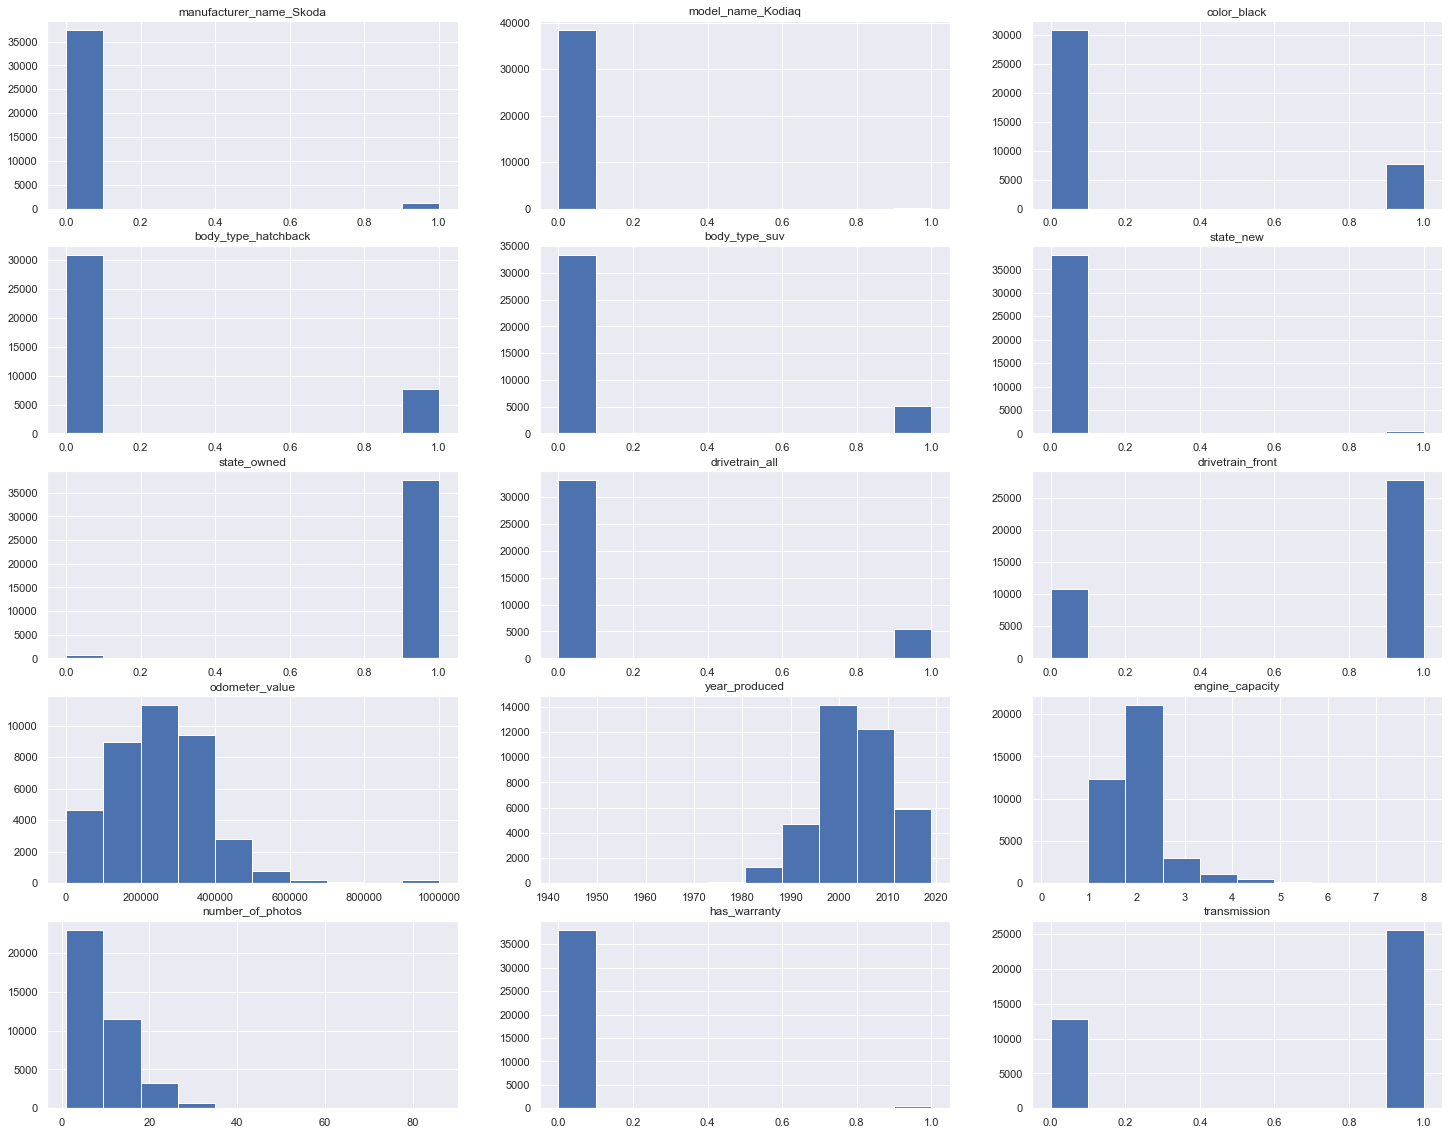

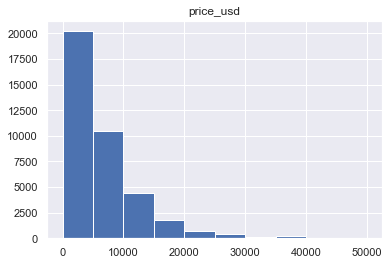

In [64]:
plt.figure(figsize = (25,20))
num = 1
for col in X_clean.columns:
    plt.subplot(5,3,num)
    plt.hist(X_clean[col])
    plt.title(col)
    num += 1
plt.show()

plt.hist(data['price_usd'])
plt.title('price_usd')
plt.show()
    

In [140]:
cat = ['manufacturer_name_Skoda', 'model_name_Kodiaq', 'color_black', 'body_type_hatchback', 
       'body_type_suv', 'state_new', 'state_owned', 'drivetrain_all', 'drivetrain_front',
      'has_warranty', 'transmission']
num = ['odometer_value', 'year_produced', 'engine_capacity', 'number_of_photos']

Text(0.5, 1.0, 'odometer_value')

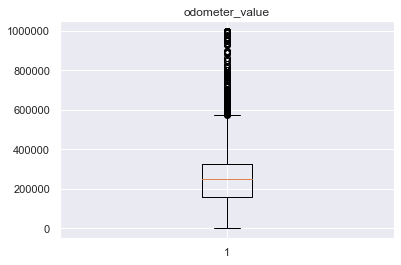

In [120]:
plt.boxplot(X_clean['odometer_value'])
plt.title(num[0])

Text(0.5, 1.0, 'year_produced')

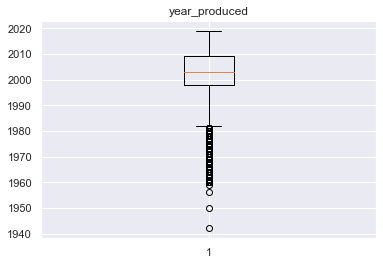

In [119]:
plt.boxplot(X_clean['year_produced'])
plt.title(num[1])

Text(0.5, 1.0, 'engine_capacity')

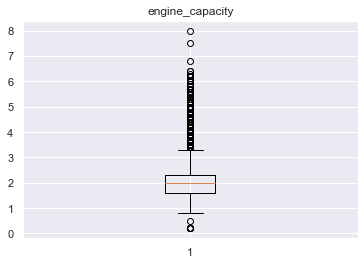

In [121]:
plt.boxplot(X_clean[num[2]])
plt.title(num[2])

Text(0.5, 1.0, 'number_of_photos')

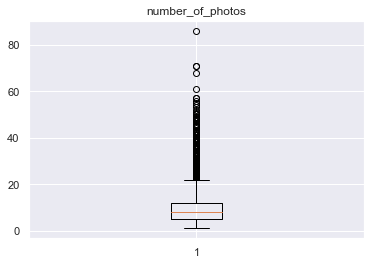

In [123]:
plt.boxplot(X_clean[num[3]])
plt.title(num[3])

Text(0.5, 1.0, 'price_usd')

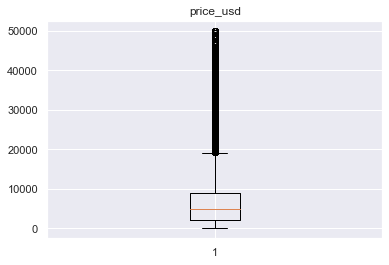

In [128]:
plt.boxplot(y)
plt.title('price_usd')

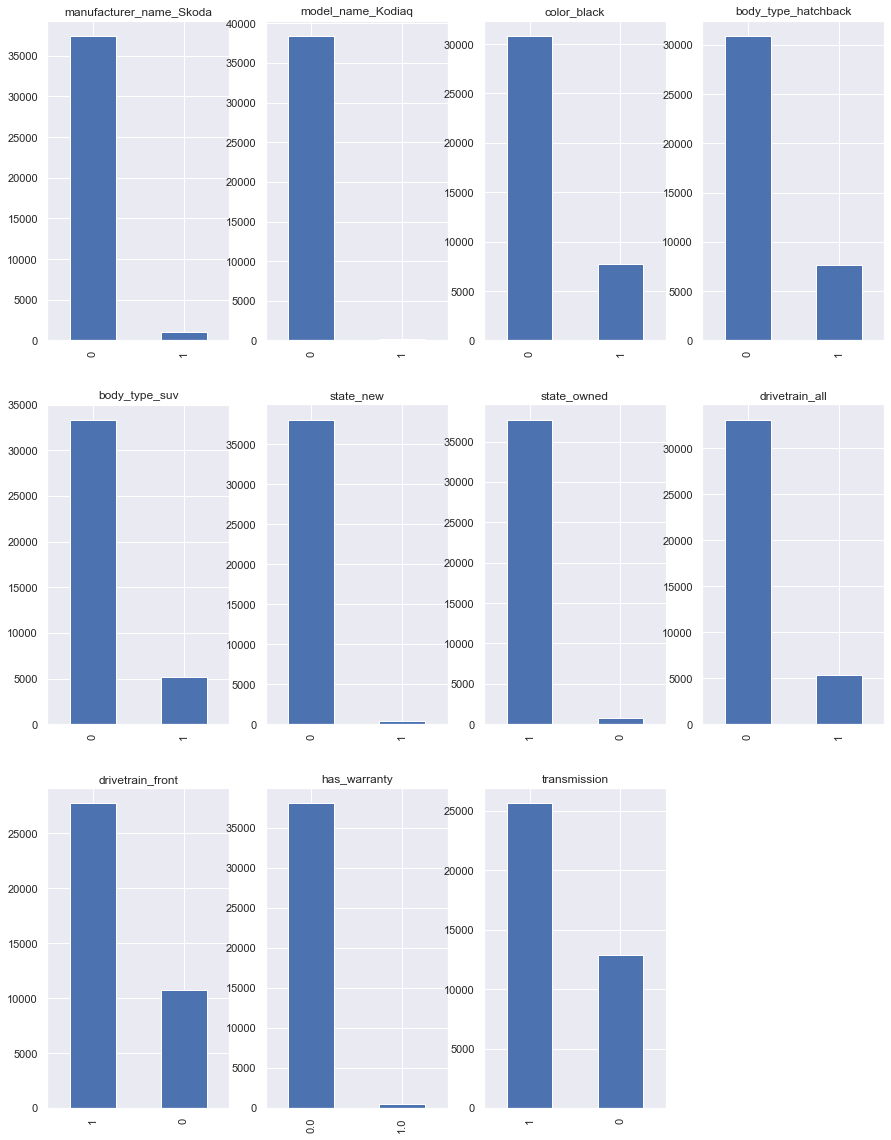

In [143]:
#0 = no
#1 = yes
plt.figure(figsize = (15,20))
count = 1
for col in cat:
    plt.subplot(3,4,count)
    X_clean[col].value_counts().plot(kind='bar', title = col);
    count += 1
plt.show()

<b>Modeling Data</b><br>
        1. Linear Regression
        2. Random Forest Regression
        3. KNN Regression

<b>1. Linear Regression</b><br>
      
      a. Training Model
      b. Compare Model to Base Case
      c. The Performance

In [66]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

Xtrain, Xtest, ytrain, ytest = train_test_split(X_clean, y, random_state = 42)

Xtrain = sm.add_constant(Xtrain)
OLS_results = sm.OLS(ytrain, Xtrain).fit()
print(OLS_results.summary())
#Xtrain.drop('const', axis = 1, inplace = True)


                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     4237.
Date:                Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:04:13   Log-Likelihood:            -2.7739e+05
No. Observations:               28890   AIC:                         5.548e+05
Df Residuals:                   28874   BIC:                         5.549e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -8

C:\Users\D-9\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


OLS Regression against base case

In [67]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(Xtrain, ytrain)

Xtest = sm.add_constant(Xtest)
lrm_pred = lrm.predict(Xtest)
lrm_errors = abs(lrm_pred - ytest)# Print out the mean absolute error (mae)
print('Average Sales Price: ', ytest.mean())
print('Mean Absolute Error:', round(np.mean(lrm_errors), 2), 'dollar')

Average Sales Price:  6700.073355830138
Mean Absolute Error: 2344.9 dollar


C:\Users\D-9\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [68]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
print("R-squared of the model in the training set is: {}".format(lrm.score(Xtrain, ytrain)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(Xtest, ytest)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(ytest, lrm_pred)))
print("Mean squared error of the prediction is: {}".format(mse(ytest, lrm_pred)))
print("Root mean squared error of the prediction is: {}".format(rmse(ytest, lrm_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((ytest - lrm_pred) / ytest)) * 100))

R-squared of the model in the training set is: 0.687604844930982
-----Test set statistics-----
R-squared of the model in the test set is: 0.6828803627291942
Mean absolute error of the prediction is: 2344.8962054702793
Mean squared error of the prediction is: 13371240.545048239
Root mean squared error of the prediction is: 3656.670691359592
Mean absolute percentage error of the prediction is: 145.15447116911983


In [69]:
#R-Squared Value
from sklearn.model_selection import cross_val_score
lrm_score = cross_val_score(lrm, X_clean, y, cv=5, n_jobs = -1, verbose = 3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


In [70]:
print('Cross Validation Scores: ', lrm_score)
print('Average Cross Validation Score: ', lrm_score.mean())

Cross Validation Scores:  [0.65124169 0.64367419 0.59565059 0.62787837 0.67649233]
Average Cross Validation Score:  0.6389874335700864


In [71]:
#Mean Absolute Error
from sklearn.model_selection import cross_val_score
lrm_score_mae = cross_val_score(lrm, X_clean, y, cv=5, n_jobs = -1, scoring = 'neg_mean_absolute_error', verbose = 3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [72]:
print('Cross Validation Scores MAE: ', lrm_score_mae)
print('Average Cross Validation Score MAE ', lrm_score_mae.mean())

Cross Validation Scores MAE:  [-2115.56527163 -1940.26128626 -2728.48737348 -2686.76777597
 -2706.8577264 ]
Average Cross Validation Score MAE  -2435.5878867460397


<b>2. Random Forest Regression</b><br>

      a. Training Model
      b. Compare Model to Base Case
      c. Fine Tune the Model

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(Xtrain, ytrain)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [74]:
# Use the forest's predict method on the test data
rf_pred = rf.predict(Xtest)# Calculate the absolute errors
rf_errors = abs(rf_pred - ytest)# Print out the mean absolute error (mae)
print('Average Sales Price: ', ytest.mean())
print('Mean Absolute Error:', round(np.mean(rf_errors), 2), 'dollars')
#Mean Absolute Error: 3.83 degrees.

Average Sales Price:  6700.073355830138
Mean Absolute Error: 1509.23 dollars


In [75]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
print("R-squared of the model in the training set is: {}".format(rf.score(Xtrain, ytrain)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(rf.score(Xtest, ytest)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(ytest, rf_pred)))
print("Mean squared error of the prediction is: {}".format(mse(ytest, rf_pred)))
print("Root mean squared error of the prediction is: {}".format(rmse(ytest, rf_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((ytest - rf_pred) / ytest)) * 100))

R-squared of the model in the training set is: 0.9797059080598041
-----Test set statistics-----
R-squared of the model in the test set is: 0.8507776786634581
Mean absolute error of the prediction is: 1509.2315405760478
Mean squared error of the prediction is: 6291907.907227771
Root mean squared error of the prediction is: 2508.3675781726593
Mean absolute percentage error of the prediction is: 102.14589416702762


In [76]:
#Adjusted R-squared Values
rf_score = cross_val_score(rf, X_clean, y, cv=5, n_jobs =  -1, verbose = 3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


In [77]:
print('Cross Validation Scores: ',rf_score)
print('Average Cross Validation Score: ', rf_score.mean())

Cross Validation Scores:  [0.80999193 0.7573313  0.79190915 0.82421974 0.85051206]
Average Cross Validation Score:  0.8067928345692723


In [78]:
#Mean Absoluate Error
rf_score_mae = cross_val_score(rf, X_clean, y, cv = 5, n_jobs = -1, verbose = 3, scoring = 'neg_mean_absolute_error')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


In [79]:
print('Cross Validation Scores: ',rf_score_mae)
print('Average Cross Validation Score: ', rf_score_mae.mean())

Cross Validation Scores:  [-1445.71516428 -1427.35622476 -1831.13063896 -1869.38845547
 -1823.65110476]
Average Cross Validation Score:  -1679.4483176445603


<b>Fine Tune Random Forest Model</b>

    Gridsearch

In [80]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators': [x for x in range(100, 1100, 100)], 
         'max_depth': [depth for depth in range(2, 11)]}

rf_gridsearch = GridSearchCV(estimator = rf,
                             param_grid=param,
                             n_jobs = -1,
                             verbose = 3)
rf_gridsearch.fit(X_clean, y)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 22.3min finished


GridSearchCV(estimator=RandomForestRegressor(n_estimators=1000,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             verbose=3)

In [81]:
rf_gridsearch.score(X_clean, y)

0.8909038430768366

In [82]:
rf_gridsearch.best_estimator_

RandomForestRegressor(max_depth=9, random_state=42)

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf_tuned = RandomForestRegressor(max_depth = 8, 
                                 n_estimators = 400, 
                                 random_state = 42)
rf_tuned.fit(Xtrain, ytrain)

RandomForestRegressor(max_depth=8, n_estimators=400, random_state=42)

In [84]:
# Use the forest's predict method on the test data
rf_tuned_pred = rf_tuned.predict(Xtest)# Calculate the absolute errors
rf_tuned_errors = abs(rf_tuned_pred - ytest)# Print out the mean absolute error (mae)
print('Average Sales Price: ', ytest.mean())
print('Mean Absolute Error:', round(np.mean(rf_tuned_errors), 2), 'dollars')
#Mean Absolute Error: 3.83 degrees.

Average Sales Price:  6700.073355830138
Mean Absolute Error: 1503.41 dollars


In [85]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
print("R-squared of the model in the training set is: {}".format(rf_tuned.score(Xtrain, ytrain)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(rf_tuned.score(Xtest, ytest)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(ytest, rf_tuned_pred)))
print("Mean squared error of the prediction is: {}".format(mse(ytest, rf_tuned_pred)))
print("Root mean squared error of the prediction is: {}".format(rmse(ytest, rf_tuned_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((ytest - rf_tuned_pred) / ytest)) * 100))

R-squared of the model in the training set is: 0.8824153921023015
-----Test set statistics-----
R-squared of the model in the test set is: 0.8528121685331229
Mean absolute error of the prediction is: 1503.4117658900157
Mean squared error of the prediction is: 6206124.3409123225
Root mean squared error of the prediction is: 2491.209413299557
Mean absolute percentage error of the prediction is: 109.4426951425339


In [86]:
rf_tune_score = cross_val_score(rf_tuned, X_clean, y, cv=5, n_jobs = -1)

In [87]:
print('Cross Validation Scores: ',rf_tune_score)
print('Average Cross Validation Scores: ', rf_tune_score.mean())

Cross Validation Scores:  [0.82499922 0.77079282 0.80044036 0.83779333 0.84569098]
Average Cross Validation Scores:  0.8159433417982497


In [88]:
rf_tune_score_mae = cross_val_score(rf_tuned, X_clean, y, cv=5, n_jobs = -1, scoring = 'neg_mean_absolute_error')

In [89]:
print('Cross Validation Scores MAE: ', rf_tune_score_mae)
print('Average Cross Validation Score: ', rf_tune_score_mae.mean())

Cross Validation Scores MAE:  [-1377.37457885 -1399.48575746 -1806.48718987 -1786.18881484
 -1797.16336398]
Average Cross Validation Score:  -1633.3399409991312


<b>3. KNN Regression</b><br>
    
      a. Training Model
      b. KNN Model Compared to Base Case
      c. Fine Tune KNN Regression

In [90]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()
knn.fit(Xtrain, ytrain)
knn_pred = knn.predict(Xtest)
knn_errors = abs(knn_pred - ytest)
print('Average Sales Price: ', ytest.mean())
print('Mean Absolute Error: ', round(np.mean(knn_errors), 2), 'dollars')

Average Sales Price:  6700.073355830138
Mean Absolute Error:  2640.29 dollars


In [91]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
print("R-squared of the model in the training set is: {}".format(knn.score(Xtrain, ytrain)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(knn.score(Xtest, ytest)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(ytest, knn_pred)))
print("Mean squared error of the prediction is: {}".format(mse(ytest, knn_pred)))
print("Root mean squared error of the prediction is: {}".format(rmse(ytest, knn_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((ytest - knn_pred) / ytest)) * 100))

R-squared of the model in the training set is: 0.693086896374953
-----Test set statistics-----
R-squared of the model in the test set is: 0.547430774699766
Mean absolute error of the prediction is: 2640.2922429654236
Mean squared error of the prediction is: 19082425.884613156
Root mean squared error of the prediction is: 4368.343608807938
Mean absolute percentage error of the prediction is: 124.03826284570367


In [92]:
knn_score = cross_val_score(knn, X_clean, y, cv=5)

In [93]:
print('Cross Validation Scores: ',knn_score)
print('Average Cross Vaidation Score: ',knn_score.mean())

Cross Validation Scores:  [0.46163037 0.24430331 0.47065304 0.48372269 0.60045801]
Average Cross Vaidation Score:  0.45215348591374765


<b>Fine Tune KNN Model</b><br>
    
    Gridsearch

In [94]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [95]:
knn_param = {'n_neighbors': [3,5,11,19],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']}


knn_gridsearch = GridSearchCV(knn,
             param_grid = knn_param, verbose = 1, cv = 5,n_jobs = -1)
knn_gridsearch.fit(X_clean, y)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.3s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [96]:
knn_gridsearch.best_estimator_

KNeighborsRegressor(metric='manhattan', n_neighbors=11, weights='distance')

In [97]:
from sklearn import neighbors
knn_tuned = knn_gridsearch.best_estimator_
knn_tuned.fit(Xtrain, ytrain)
knn_tuned_pred = knn.predict(Xtest)
knn_tuned_errors = abs(knn_pred - ytest)
print('Average Sales Price: ', ytest.mean())
print('Mean Absolute Error: ', round(np.mean(knn_tuned_errors), 2), 'dollars')

Average Sales Price:  6700.073355830138
Mean Absolute Error:  2640.29 dollars


In [98]:
knn_tuned_score = cross_val_score(knn_tuned, X_clean, y, cv=5)

In [99]:
print('Cross Validation Scores: ',knn_tuned_score)
print('Average Cross Validation Score: ', knn_tuned_score.mean())

Cross Validation Scores:  [0.54964008 0.34586341 0.51516574 0.53741739 0.63006959]
Average Cross Validation Score:  0.5156312429554657


In [100]:
knn_tuned_mae_score = cross_val_score(knn_tuned, X_clean, y, cv=5, scoring = 'neg_mean_squared_error')

In [101]:
print('Cross Validation Scores: ',knn_tuned_mae_score)
print('Average Cross Validation Score: ', knn_tuned_mae_score.mean())

Cross Validation Scores:  [-12492380.65899571 -14871843.26416236 -18067774.71409388
 -22536399.8598113  -22508838.68663463]
Average Cross Validation Score:  -18095447.436739575


<b>Gradient Boosting

In [102]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state = 42)
reg.fit(Xtrain, ytrain)
#GradientBoostingRegressor(random_state=42)
reg.predict(Xtest)
reg.score(Xtest,ytest)

0.85334523161569

# -------------------------END HERE---------------------------------------------------------------